# Importing the Data: 
 Note: Previous problem and data understanding can be found in the main repository for this project. 

In [ ]:
!git clone "https://github.com/DeeJayCar/DS201-Covid_Happy-Project"

Cloning into 'DS201-Covid_Happy-Project'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Merged Dataset between Covid and 2020-21 Happiness
total_data = pd.read_excel("DS201-Covid_Happy-Project/final_covid_happy_data.xlsx")

#Base Year Happiness
happy_data_18 = pd.read_excel("DS201-Covid_Happy-Project/Happy_2018-2019.xlsx")

Removing columns not needed for this analysis, but other researchers may find value in. To find data descriptions of these variables we omit, refer to our linked data sources. Note, however, additional data cleaning may be required for dropped columns. 

In [ ]:
total_data.drop("new_cases", axis=1, inplace=True)
total_data.drop("new_cases_smoothed", axis=1, inplace=True)
total_data.drop("new_deaths", axis=1, inplace=True)
total_data.drop("new_deaths_smoothed", axis=1, inplace=True)
total_data.drop("new_vaccinations", axis=1, inplace=True)
total_data.drop("total_vaccinations", axis=1, inplace=True)
total_data.drop("people_fully_vaccinated", axis=1, inplace=True)
total_data.drop("date", axis=1, inplace=True)
total_data.drop("population_density", axis=1, inplace=True)
total_data.drop("gdp_per_capita", axis=1, inplace=True)
total_data.drop("total_boosters", axis=1, inplace=True)
total_data.drop("month", axis=1, inplace=True)
total_data.drop("human_development_index", axis=1, inplace=True)
total_data.drop("excess_mortality_cumulative_abso", axis=1, inplace=True)
total_data.drop("excess_mortality_cumulative", axis=1, inplace=True)
total_data.drop("excess_mortality_cumulative_per_", axis=1, inplace=True)
total_data.drop("excess_mortality", axis=1, inplace=True)
total_data.drop("stringency_index", axis=1, inplace=True)
total_data.drop("people_vaccinated", axis=1, inplace=True)
total_data.drop("new_vaccinations_smoothed_Y", axis=1, inplace=True)
total_data.drop("people_vaccinated_Y", axis=1, inplace=True)
total_data.drop("new_vaccinations_smoothed", axis=1, inplace=True)
total_data.drop("new_people_vaccinated_smoothed", axis=1, inplace=True)
total_data.drop("B", axis=1, inplace=True)
total_data.drop("C", axis=1, inplace=True)
total_data.drop("D", axis=1, inplace=True)

# Overview of Data
In this next section, we provide the data types and basic summary statistics of the imported dataframes. 

As seen below initially, all of our datatypes are numeric despite being stored differently. 

In [ ]:
total_data.dtypes

location                             object
year                                  int64
total_cases                         float64
total_deaths                        float64
population                            int64
median_age                          float64
life_expectancy                     float64
new_cases_Y                           int64
new_deaths_Y                          int64
new_people_vaccinated_smoothed_Y      int64
stringency_Y                        float64
Score                               float64
GDP per capita                      float64
Social support                      float64
Healthy life expectancy             float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
diff20_19                           float64
diff21_19                           float64
dtype: object

In [ ]:
happy_data_18.dtypes

Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Year                              int64
dtype: object

We also check for blank cells, which do exist for some datapoints; however this impacts relatively few observations. 
Afterward, the general summary statistic table is provided as a general overview of the available features for analysis. 

In [ ]:
total_data.isna().sum()

location                            0
year                                0
total_cases                         1
total_deaths                        3
population                          0
median_age                          0
life_expectancy                     0
new_cases_Y                         0
new_deaths_Y                        0
new_people_vaccinated_smoothed_Y    0
stringency_Y                        6
Score                               0
GDP per capita                      0
Social support                      0
Healthy life expectancy             0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
diff20_19                           0
diff21_19                           0
dtype: int64

To run a single t-test on the differenced happiness score pre- and post-covid, we must remove the country (Zimbabwe), which did not have an associated happiness score in the post-Covid era. We also remove the one country

In [ ]:
#Two countries
total_data = total_data[total_data['diff20_19'].notna()]

In [ ]:
happy_data_18.isna().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

In [ ]:
total_data.describe()

,year,total_cases,total_deaths,population,median_age,life_expectancy,new_cases_Y,new_deaths_Y,new_people_vaccinated_smoothed_Y,stringency_Y,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,diff20_19,diff21_19
count,273.000000,2.720000e+02,270.000000,2.730000e+02,273.000000,273.000000,2.730000e+02,273.000000,2.730000e+02,267.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2020.501832,1.340059e+06,26644.659259,5.472101e+07,31.281685,73.396007,1.032762e+06,19461.926740,1.413009e+07,56.257794,5.539746,9.377121,0.814503,64.952581,0.791990,-0.014414,0.725189,0.022982,0.048993
std,0.500915,4.597955e+06,81195.196818,1.751504e+08,9.231597,7.374359,3.233978e+06,55480.138194,6.845846e+07,13.844518,1.087684,1.174138,0.115803,6.615636,0.116792,0.153758,0.180626,0.691404,0.710844
min,2020.000000,4.100000e+01,1.000000,3.687920e+05,15.100000,54.240000,0.000000e+00,0.000000,0.000000e+00,7.279699,2.523000,6.492642,0.463000,48.003624,0.382000,-0.300907,0.082000,-2.335700,-2.233000
25%,2020.000000,4.292375e+04,619.250000,5.453600e+06,23.300000,67.940000,3.532100e+04,448.000000,0.000000e+00,48.602562,4.784800,8.493160,0.743307,59.802000,0.719000,-0.128538,0.665950,-0.057900,-0.124000
50%,2021.000000,2.116745e+05,3214.000000,1.225543e+07,30.600000,75.050000,1.893870e+05,2697.000000,2.453940e+05,56.874065,5.546100,9.537965,0.836000,66.603000,0.809961,-0.037741,0.777931,0.046800,0.069000
75%,2021.000000,7.508152e+05,15652.750000,3.983543e+07,39.700000,78.570000,6.322630e+05,10861.000000,4.861033e+06,65.904781,6.257600,10.350000,0.906747,69.289192,0.886983,0.084000,0.845000,0.213300,0.275000
max,2021.000000,5.483585e+07,824338.000000,1.444216e+09,48.200000,84.630000,3.464452e+07,474484.000000,8.410399e+08,88.403953,7.842000,11.647000,0.983000,76.953000,0.974998,0.560664,0.939000,3.072500,3.160000


# Data Exploration
To begin exploring, we consider how to distribution of happiness may, or may not have changed as a result of the pandemic. The World Happiness Report indicated that many people did suffer mental issues, however we seek to validate their claim and whether it holds significance. To test the claim, we created the difference in happiness across all countries between 2019 and 2020, and 2019 and 2021 respectively--we will run a one-sample t-test on this country-by-country differenced data. 

Mean:  5.391506410256412


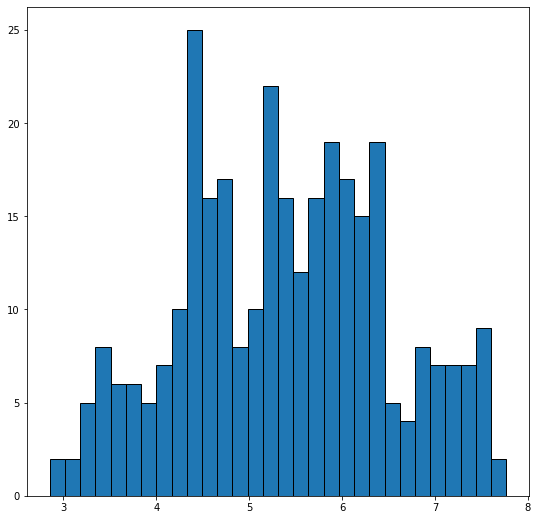

In [ ]:
#Happiness Distribution Pre-Covid
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(happy_data_18["Score"], bins=30, edgecolor="black");
print("Mean: ", np.mean(happy_data_18["Score"]))

Mean:  5.545628359410908


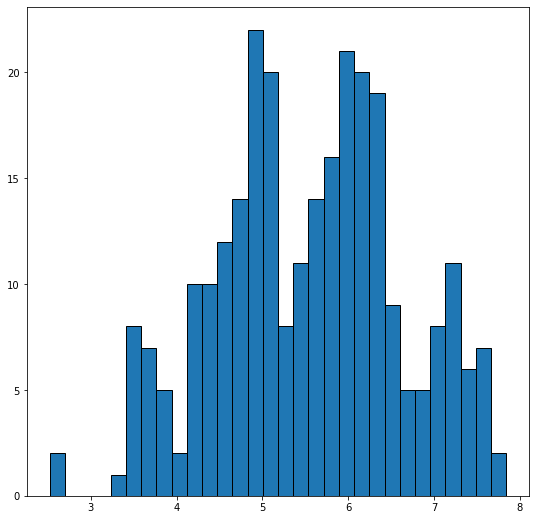

In [ ]:
#Happiness Distribution Post-Covid
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(total_data["Score"], bins=30, edgecolor="black");
print("Mean: ", np.mean(total_data["Score"]))

While these graphs seem to indicate that happiness did not significantly change between the two periods, we will also perform a t-test on the difference between the happiness scores of the periods. If we did not use differenced data, we would have to perform a paird t-test. 

In [ ]:
from scipy import stats as st
#Code to test Difference#
a=total_data["diff20_19"].to_numpy()
b=total_data["diff21_19"].to_numpy()

print(st.ttest_1samp(a=a,popmean=0))
print(st.ttest_1samp(a=b, popmean=0))

#t.test(total_data$diff20_19)

Ttest_1sampResult(statistic=0.5884511723834992, pvalue=0.5567142433565846)
Ttest_1sampResult(statistic=1.1846836179974696, pvalue=0.23716912158439882)


The results of the t-tests are insignificant. We can not conclude happiness has shifted in any direction since the pandemic began; however, we find that the mean happiness level is relatively stable across both periods, with happiness levels rising throughout the pandemic by a very small (insignificant) amount. In the face of this, it is prudent to consider any other correlations that exist between the data features. To visualize this, we will construct a correlation matrix. 

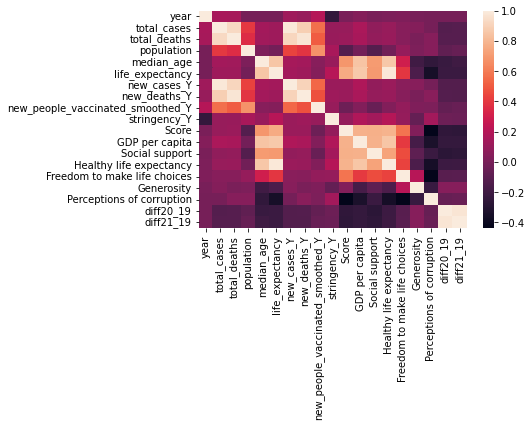

In [ ]:
import seaborn as sns 

ax=sns.heatmap(total_data.corr(), annot=False)

The above correlation plot visualizes any relations between the Covid data and World Happiness data between 2020-21. This particular graph does not indicate any noticeable relations, but we will also present the individual correlation plots for individual years to possibly identify any differences between the specific years. 

In [ ]:
#heatmap by year
t20=total_data.copy()
t21=total_data.copy()
t20=t20[t20.year==2020]
t21=t21[t21.year==2021]

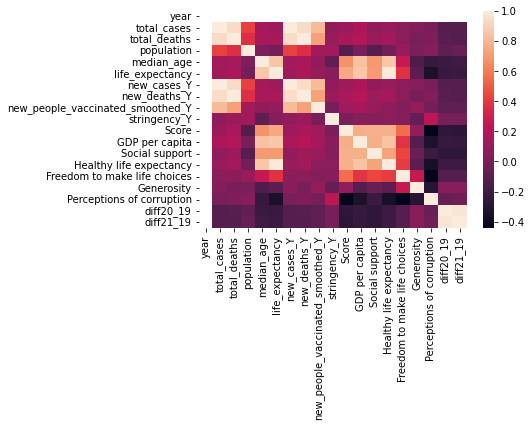

In [ ]:
#2020 Correlation Plot
ax=sns.heatmap(t20.corr(), annot=False)

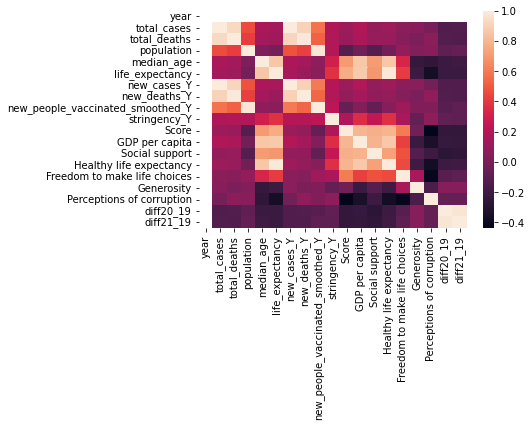

In [ ]:
#2021 Correlation Plot
ax=sns.heatmap(t21.corr(), annot=False)

The individual years do not present a much different picture than the holisitc view, unfortunately. While happiness and covid do not appear to have a meangingful connection on a global scale in this dataset, we still seek to provide insights for government officials that can be useful in improving the well-being of their citizens. To this end, we continue by exploring the qualities that impact happiness within the World Happiness Report datset. By seeing what makes a country happier, other countries may be able to mirror these general guidelines in order to collectively increase happiness and make the "insignificant" difference "significant" even in trying times. 

Using the correlation matrices, we present some of the more interesting correlations that presented themselves that may be useful for governments to learn from. 

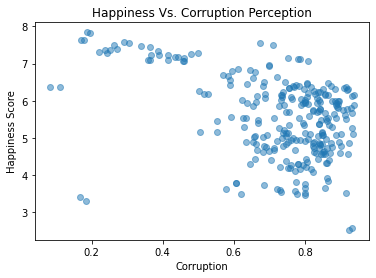

In [ ]:
x=total_data["Perceptions of corruption"]
y=total_data["Score"]
plt.scatter(x, y, alpha=0.5)

plt.title("Happiness Vs. Corruption Perception")
plt.xlabel("Corruption")
plt.ylabel("Happiness Score")
plt.show()

While not a linear fit, a nonlinear correlation may exist in this model. Either way, the general message is clear--if more citizens perceive their country as corrupt (a corruption index value closer to 1), then happiness is bound to decline; meanwhile, citizens who believe their governments above-board generally grade higher happiness scores. 

Next, we consider happiness and how an individual perceives their individual freedom a country's citizen. 

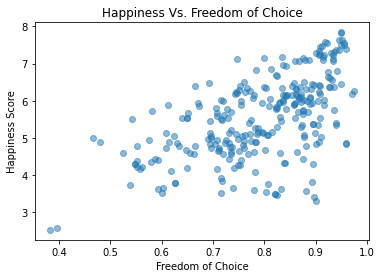

In [ ]:
x=total_data["Freedom to make life choices"]
y=total_data["Score"]
plt.scatter(x, y, alpha=0.5)

plt.title("Happiness Vs. Freedom of Choice")
plt.xlabel("Freedom of Choice")
plt.ylabel("Happiness Score")
plt.show()

The strongest correlation yet has been found. While a seemingly obvious thing, this quality is integral to making any citizen happy. Far too often we get lost in the minute details and fail to consider the big picture. As Americans, it is a privelege we take for granted, but for many others it is a gift that would drastically increase the quality of their lives under government oppression. 

In fact, the freedom to make life decisions is also shown to positively correlate with life expectancy, which in turn positively correlates to happiness score. The longer people live, the more interconnected families become and heighten life satisfaction--therefore it is integral that despite the lack of statiscial evidence between covid and happiness--governments protect the health and safety of its citizens from a pandemic that ravages its population and slashes its life expectancy. 

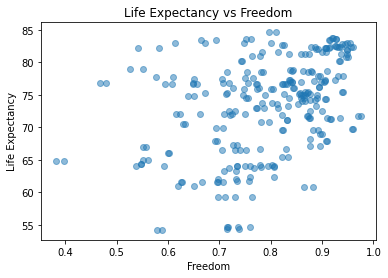

In [ ]:
x=total_data["Freedom to make life choices"]
y=total_data["life_expectancy"]
plt.scatter(x, y, alpha=0.5)

plt.title("Life Expectancy vs Freedom")
plt.xlabel("Freedom")
plt.ylabel("Life Expectancy")
plt.show()

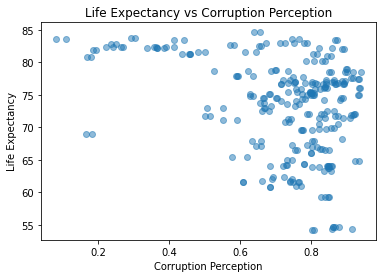

In [ ]:
x=total_data["Perceptions of corruption"]
y=total_data["life_expectancy"]
plt.scatter(x, y, alpha=0.5)

plt.title("Life Expectancy vs Corruption Perception")
plt.xlabel("Corruption Perception")
plt.ylabel("Life Expectancy")
plt.show()

These scatter plots make it clear that life expectancy is negatively impacted in a country where government corruption is abound (at least as perceived by its citizens, and in a nonlinear fashion) and that freedom is positively correlated to life expectancy. To drive the relation home, we will visualize the relation between life expectancy and the happiness score.

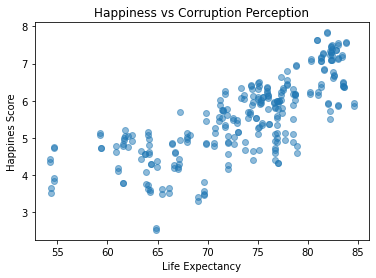

In [ ]:
x=total_data["life_expectancy"]
y=total_data["Score"]
plt.scatter(x, y, alpha=0.5)

plt.title("Happiness vs Corruption Perception")
plt.xlabel("Life Expectancy")
plt.ylabel("Happines Score")
plt.show()

We will revisit these relations in a later linear machine learning model. In the meantime, we also wish to consider one last possible connection between happiness and Covid, that also has the possiblity of impacting life expectancy: vacciantions in coountries across the globe. To consider this possible relation, we will utilize the "new vaccinations" from only 2021 since vaccines only began to be administered in late 2020 for a select few countries. 


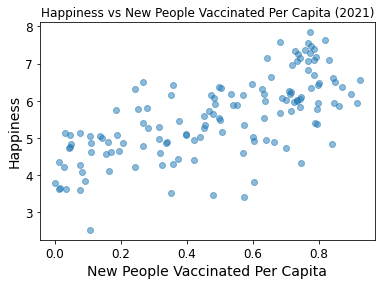

In [ ]:
x=(t21["new_people_vaccinated_smoothed_Y"]/t21["population"])
y=t21["Score"]
plt.scatter(x, y, alpha=0.5)

plt.title("Happiness vs New People Vaccinated Per Capita (2021)")
plt.xlabel("New People Vaccinated Per Capita")
plt.ylabel("Happiness")
plt.show()

From initial 2021 data, we can surmise a positive relation between more vaccines per capita (a normalized version of the "new_people_vaccinated_smoothed_Y") and happiness. This follows our general intution that countries that work to ensure a higher life expectancy (say via national vaccination campaigns), the more happy that society is as familial units coexist for longer periods of time. 

# ML ALGORITHIM
To capitalize on the relation between this newly discovered relationship, we construction a Linear Regression algorithm to ascertain a numeric relationship between our target variable, happiness scores, and new vaccinations per capita in each country. It is important to note that this algorithm will only be able to use 2021 data contained with the "t21" dataframe given that this was the first year vaccinations were widely available to the general public. 

In [ ]:
######SETUP######
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

#import warnings
#warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Common imports
import numpy as np
import os

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)


def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

In [ ]:
#First, we separate our data into a training and test set. Reshape so it is noticable to LR model. 
np.random.seed(42)
X=(t21["new_people_vaccinated_smoothed_Y"]/t21["population"]).to_numpy().reshape(-1,1)
y=t21["Score"].to_numpy().reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#generate X's over same interval as test to get predictions
X_new=np.linspace(0,1,1000).reshape(1000,1)

Degree_of_the_Polynomial_Model=3 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

[[ 5.58348182]
 [ 1.30605021]
 [-0.75404263]]
Cost value= 4.0179


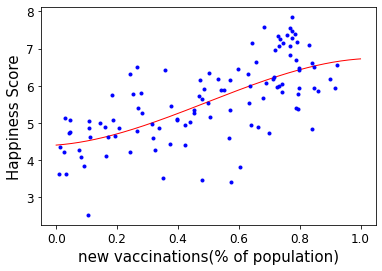

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


style="g-" 
width=1
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

#PIPELINE
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

#Fitting the Model
polynomial_regression.fit(X_train, y_train)

y_newbig = polynomial_regression.predict(X_new)

#Plotting the linear regression of the training data against the training data points. 
plt.plot(X_new, y_newbig,"r", linewidth=1)
plt.plot(X_train, y_train, "b.", linewidth=1)
plt.xlabel("new vaccinations(% of population)", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)

#Lets get the thetas
coe=polynomial_regression.named_steps.lin_reg.coef_
interc=polynomial_regression.named_steps.lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_sklearn=np.vstack([interc,coe[1:, :]])
print(theta_sklearn)
theta_sklearn_cost=computeCost(X_poly, y, theta_sklearn)
print("Cost value= {}".format(round(theta_sklearn_cost,4)))

The optimal degree of polynomials to include in the model is a degree 3 model--which minimzed the cost function of the model. From this model, we can see a clear, positive trend where the more new vaccinations per capita in 2021, the happier its citizens were. This general idea relates closely to the EDA findings above: a longer life expectancy contributes to a happier populace. By allowing families to lengthen generational ties, a higher life satisfaction is likely to result and provide support needed during especially trying times--including pandemics.


Additionally, we seek to delineate a predictive relationship between life expectancy and another feature--the strongest relation we see is between an individual's perceived "freedom of choice". We investigate this relaton up next, but first we must update the dataset to remove a single observation who did not report life expectancy. 

In [ ]:
#need to not consider countries that have NaN values for 'life expectancy'
total_data=total_data[total_data['life_expectancy'].notna()]

In [ ]:
#First, we separate our data into a training and test set. Reshape so it is noticable to LR model. 
np.random.seed(42)
X=total_data['Freedom to make life choices'].to_numpy().reshape(-1,1)
y=total_data["life_expectancy"].to_numpy().reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#generate X's over same interval as test to get predictions
X_new=np.linspace(.5,1,1000).reshape(1000,1)

Degree_of_the_Polynomial_Model=2 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

[[73.5212844 ]
 [12.35135201]]
Cost value= 79.4605


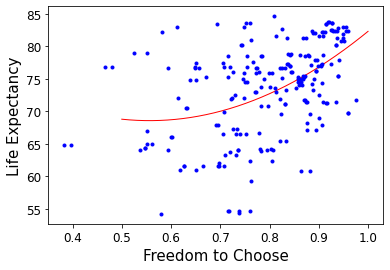

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


style="g-" 
width=1
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

#PIPELINE
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

#Fitting the Model
polynomial_regression.fit(X_train, y_train)

y_newbig = polynomial_regression.predict(X_new)

#Plotting the linear regression of the training data against the training data points. 
plt.plot(X_new, y_newbig,"r", linewidth=1)
plt.plot(X_train, y_train, "b.", linewidth=1)
plt.xlabel("Freedom to Choose", fontsize=15)
plt.ylabel("Life Expectancy", fontsize=15)

#Lets get the thetas
coe=polynomial_regression.named_steps.lin_reg.coef_
interc=polynomial_regression.named_steps.lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_sklearn=np.vstack([interc,coe[1:, :]])
print(theta_sklearn)
theta_sklearn_cost=computeCost(X_poly, y, theta_sklearn)
print("Cost value= {}".format(round(theta_sklearn_cost,4)))

The resulting model ran optimally, with the lowest cost function, at a degree 2 polynomial; however, the cost function is still relatively high , suggesting that the model is highly biased. Despite having one of the strongest relationships, it is likely that better explanatory variables exist, which would form a better model. In terms of our output, however, the upwards trend is clear--the more free a citizen feels in their own country, the higher the predicted life expectancy becomes.

This may create an interesting area of contention, as many have placed "freedom of speech" and "new vaccinations" at odds with each other, as companies and governments across the globe have mandated vaccines. The regulations have spurred many protests as citizens advocate for their "freedom of choice." It will be interesting to see how this contrast may play out in the coming years as more data becomes publicly available.

# Conclusions and Future Studies

As we conclude our cursory, exploratory analysis of the Covid dataset and World Happiness Report dataset, we determined that happiness did not significantly shift globally between 2019 and 2020-21, contradicting the generally accepted principle that global happiness plunged throughout the pandemic. Without discrediting the personal struggles faced by many over the past 2 years, the insignificant results may seem to suggest a "slowing" rather than a complete reversal of happiness trends.

In pursuit of investigating what governments can do to recover that trend we surmise a general goal they can achieve, which is particularly poignant in these volatile times: prioritize the health of your citizens. We found countries with higher life expectancies had happier citizens, a feat aided by widespread vaccination campaigns to counter the pandemic. Governments must double down on these efforts. 

We also foudn clues of insitutional features governments can seek to refine as they try to work for the people--one such feature is promoting a freer society in which citizens can live. If citizens are fearful or in an oppressive government, etc., life expectancies in those countries are found to be lower--governments shoudl prioritize reorganizing and strengthening their insitutions that ensure individual liberties. Doing so will only fortify a citizen's ability to thrive in society and push for the collective betterment (through longer life expectancies), which in turn increase long run happiness. 

In the future, additional research may seek to rigorously expand and find new features beyond our dataset. We found the happiness metric and associated data to be somewhat limiting as we got deeper into analysis and more comprehenisve and detailed data may be more useful. Moreover, it would be beneficial to allow additonal data over the coming years to be recorded and return to this topic, and additionally focus on one country across a plethora of features instead of an expansive, global comparison. Refining focus further may provide more insight than annualized, global data could provide. 